# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
url='https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv'
df = pd.read_csv(url, parse_dates=['date'])
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,7803.328512,1.922652,0.39117,NaN,-0.06626,0.10096,0.97153
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,29144.876973,2.301550,-0.28335,NaN,-0.51898,-0.43285,0.01563
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,4822.738983,1.869734,-0.05696,NaN,-0.36704,-0.25369,0.33645
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,20932.924968,2.155755,0.48988,NaN,0.00000,0.17908,1.11143
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,26087.329235,2.247266,-0.07698,NaN,-0.38047,-0.26953,0.30809


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1386 non-null   datetime64[ns]
 1   iso_a3         1386 non-null   object        
 2   currency_code  1386 non-null   object        
 3   name           1386 non-null   object        
 4   local_price    1386 non-null   float64       
 5   dollar_ex      1386 non-null   float64       
 6   dollar_price   1386 non-null   float64       
 7   GDP_bigmac     1386 non-null   float64       
 8   adj_price      1386 non-null   float64       
 9   USD            1386 non-null   float64       
 10  EUR            1359 non-null   float64       
 11  GBP            1386 non-null   float64       
 12  JPY            1386 non-null   float64       
 13  CNY            1386 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 151.7+ KB


In [3]:
df=df[(df['date'].dt.year==2019) & (df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1021,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,20810.978188,3.399753,-0.43098,-0.50205,-0.39927,-0.29817,-0.37617
1022,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,58098.493185,4.422256,-0.04923,-0.16798,0.00375,0.17267,0.04235
1023,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9362.536049,3.085813,0.42311,0.24536,0.50241,0.75525,0.56019
1024,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,48323.923768,4.154216,-0.05279,-0.17109,0.00000,0.16829,0.03846
1025,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,42034.227332,3.981740,0.23376,0.07967,0.30252,0.52171,0.35260


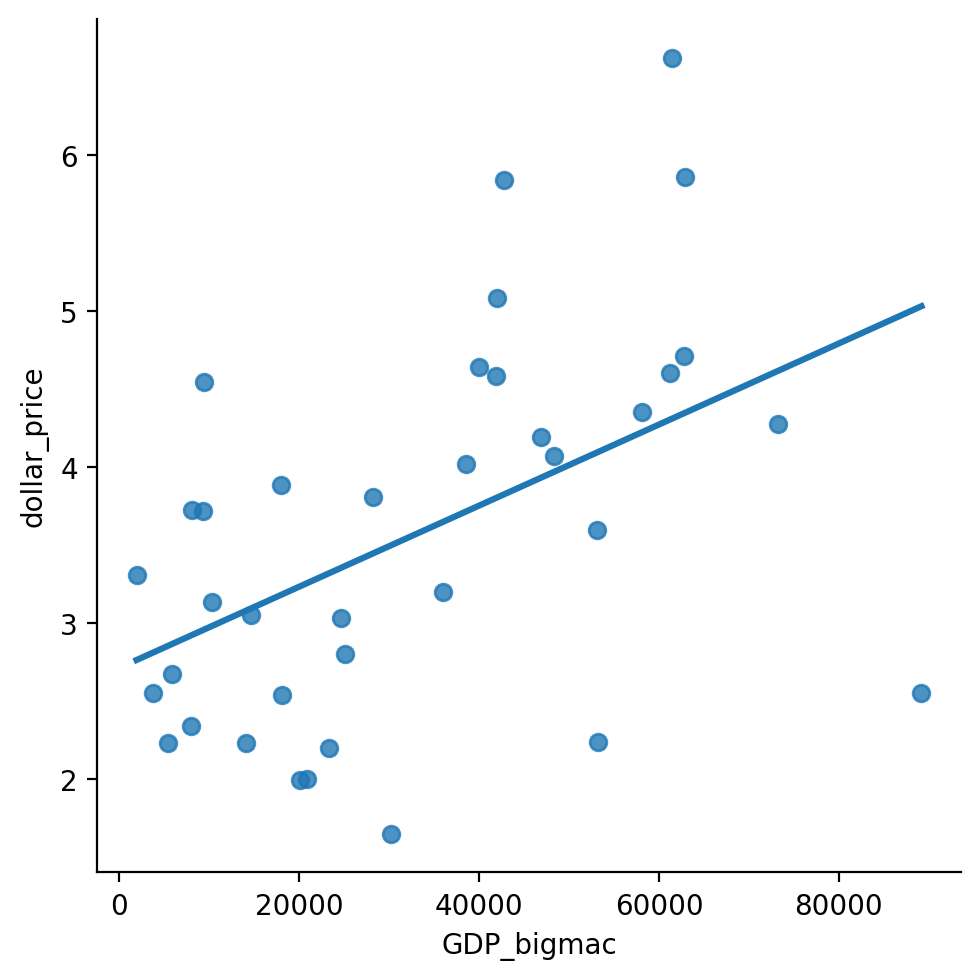

In [4]:
sns.lmplot(x='GDP_bigmac', y='dollar_price', data=df, ci=None);

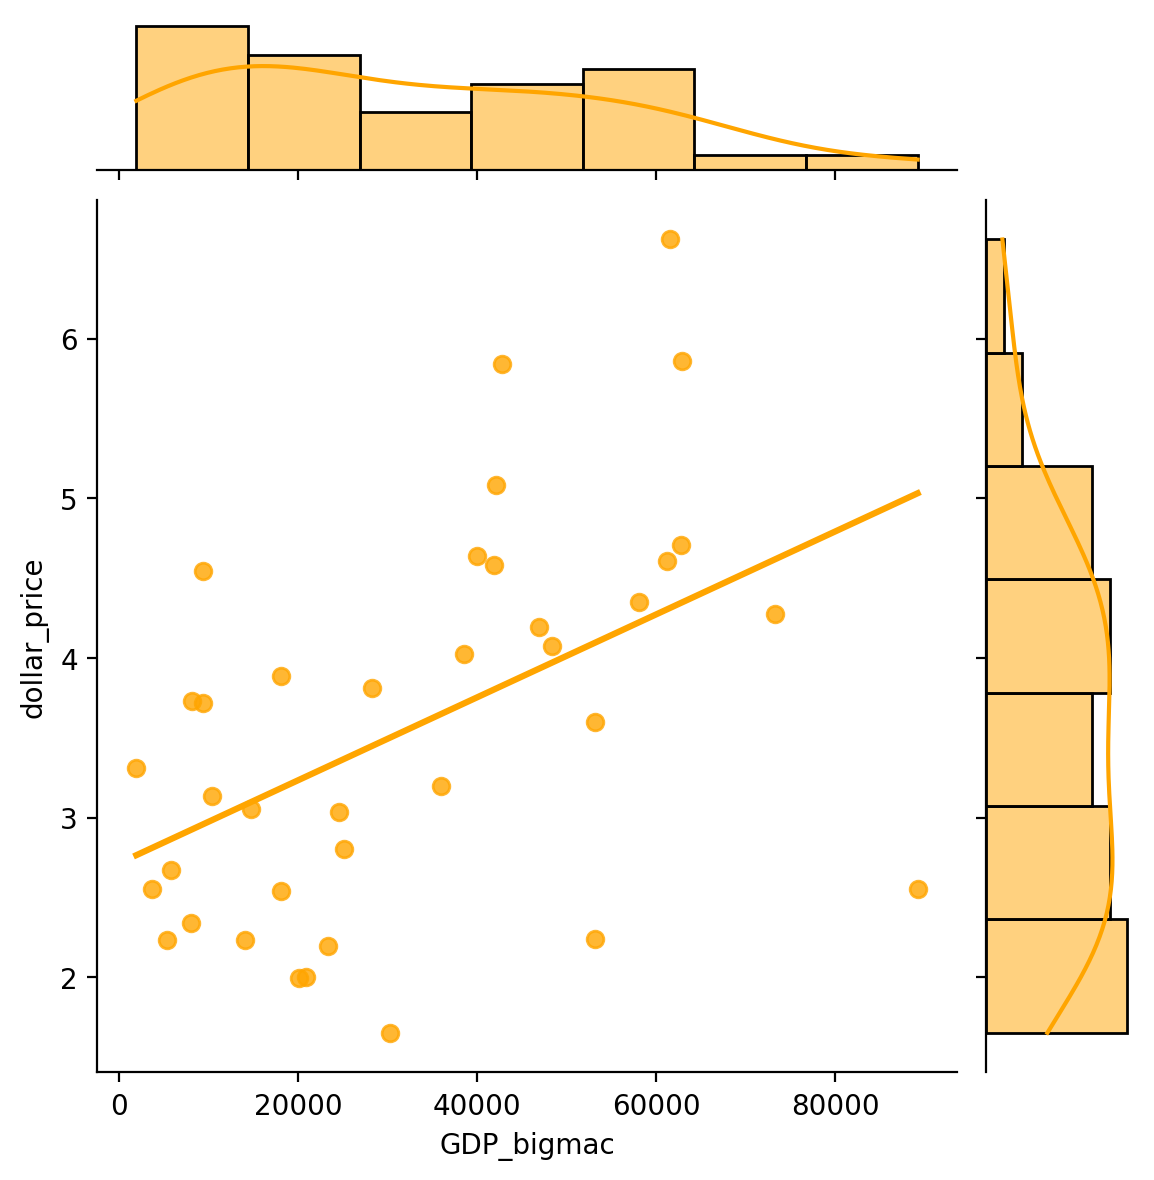

In [5]:
sns.jointplot(x='GDP_bigmac', y='dollar_price', data=df, kind='reg',ci=None,
             color='orange')

## sklearn: LinearRegression

In [6]:
import sklearn
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model

LinearRegression()

In [16]:
X = df[['GDP_bigmac']]
y = df.dollar_price

In [17]:
model.fit(X,y)

LinearRegression()

In [18]:
model.score(X,y) # R-squared

0.23519741311775022

In [19]:
model.intercept_

2.714978656576098

In [20]:
model.coef_

array([2.59773624e-05])

In [21]:
model.intercept_ + model.coef_ * 9000

array([2.94877492])

In [24]:
model.predict([[9000]]) # x should be array two dimension

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.94877492])

In [25]:
model.predict([[9000], 
               [40000]]) # x should be array two dimension

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.94877492, 3.75407315])

In [26]:
np.arange(5000, 50000, 2500)

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500])

In [29]:
# transfrom array one dimensional to two dimensional
np.arange(5000, 50000, 2500).reshape(-1, 1)

array([[ 5000],
       [ 7500],
       [10000],
       [12500],
       [15000],
       [17500],
       [20000],
       [22500],
       [25000],
       [27500],
       [30000],
       [32500],
       [35000],
       [37500],
       [40000],
       [42500],
       [45000],
       [47500]])

In [28]:
model.predict(np.arange(5000, 50000, 2500).reshape(-1, 1))

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.84486547, 2.90980887, 2.97475228, 3.03969569, 3.10463909,
       3.1695825 , 3.23452591, 3.29946931, 3.36441272, 3.42935612,
       3.49429953, 3.55924294, 3.62418634, 3.68912975, 3.75407315,
       3.81901656, 3.88395997, 3.94890337])

In [27]:
np.linspace(5000, 50000, 20)

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [30]:
np.linspace(5000, 50000, 20).reshape(-1, 1)

array([[ 5000.        ],
       [ 7368.42105263],
       [ 9736.84210526],
       [12105.26315789],
       [14473.68421053],
       [16842.10526316],
       [19210.52631579],
       [21578.94736842],
       [23947.36842105],
       [26315.78947368],
       [28684.21052632],
       [31052.63157895],
       [33421.05263158],
       [35789.47368421],
       [38157.89473684],
       [40526.31578947],
       [42894.73684211],
       [45263.15789474],
       [47631.57894737],
       [50000.        ]])

In [31]:
s=pd.Series(np.linspace(5000, 50000, 20))
s

0      5000.000000
1      7368.421053
2      9736.842105
3     12105.263158
4     14473.684211
5     16842.105263
6     19210.526316
7     21578.947368
8     23947.368421
9     26315.789474
10    28684.210526
11    31052.631579
12    33421.052632
13    35789.473684
14    38157.894737
15    40526.315789
16    42894.736842
17    45263.157895
18    47631.578947
19    50000.000000
dtype: float64

In [32]:
model.predict(s.to_frame())

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.84486547, 2.9063908 , 2.96791613, 3.02944146, 3.0909668 ,
       3.15249213, 3.21401746, 3.27554279, 3.33706813, 3.39859346,
       3.46011879, 3.52164412, 3.58316945, 3.64469479, 3.70622012,
       3.76774545, 3.82927078, 3.89079611, 3.95232145, 4.01384678])

In [33]:
dx=pd.DataFrame(np.linspace(5000, 50000, 20), columns=['gdp'])
dx

,gdp
0,5000.000000
1,7368.421053
2,9736.842105
3,12105.263158
4,14473.684211
5,16842.105263
6,19210.526316
7,21578.947368
8,23947.368421
9,26315.789474


In [34]:
model.predict(dx)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- gdp
Feature names seen at fit time, yet now missing:
- GDP_bigmac

  warnings.warn(message, FutureWarning)


array([2.84486547, 2.9063908 , 2.96791613, 3.02944146, 3.0909668 ,
       3.15249213, 3.21401746, 3.27554279, 3.33706813, 3.39859346,
       3.46011879, 3.52164412, 3.58316945, 3.64469479, 3.70622012,
       3.76774545, 3.82927078, 3.89079611, 3.95232145, 4.01384678])

## Statsmodel: Simple Linear regression 

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
# formula: response ~ predictor + predictor
model_a = smf.ols(formula='dollar_price ~ GDP_bigmac', data=df).fit()

In [37]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     10.76
Date:                Mon, 21 Nov 2022   Prob (F-statistic):            0.00235
Time:                        09:29:43   Log-Likelihood:                -54.004
No. Observations:                  37   AIC:                             112.0
Df Residuals:                      35   BIC:                             115.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7150      0.313      8.669      0.0

In [38]:
model_a.pvalues

Intercept     3.099333e-10
GDP_bigmac    2.348908e-03
dtype: float64

In [39]:
model.intercept_

2.714978656576098

In [40]:
model.coef_

array([2.59773624e-05])

In [41]:
print(f'{model.coef_[0]:.7f}')

0.0000260


# New Create Dataset by NumPy 

In [16]:
rng = np.random.default_rng()
x = np.arange(0,1000)
sx = rng.random(500)
y = 2*sx + 10

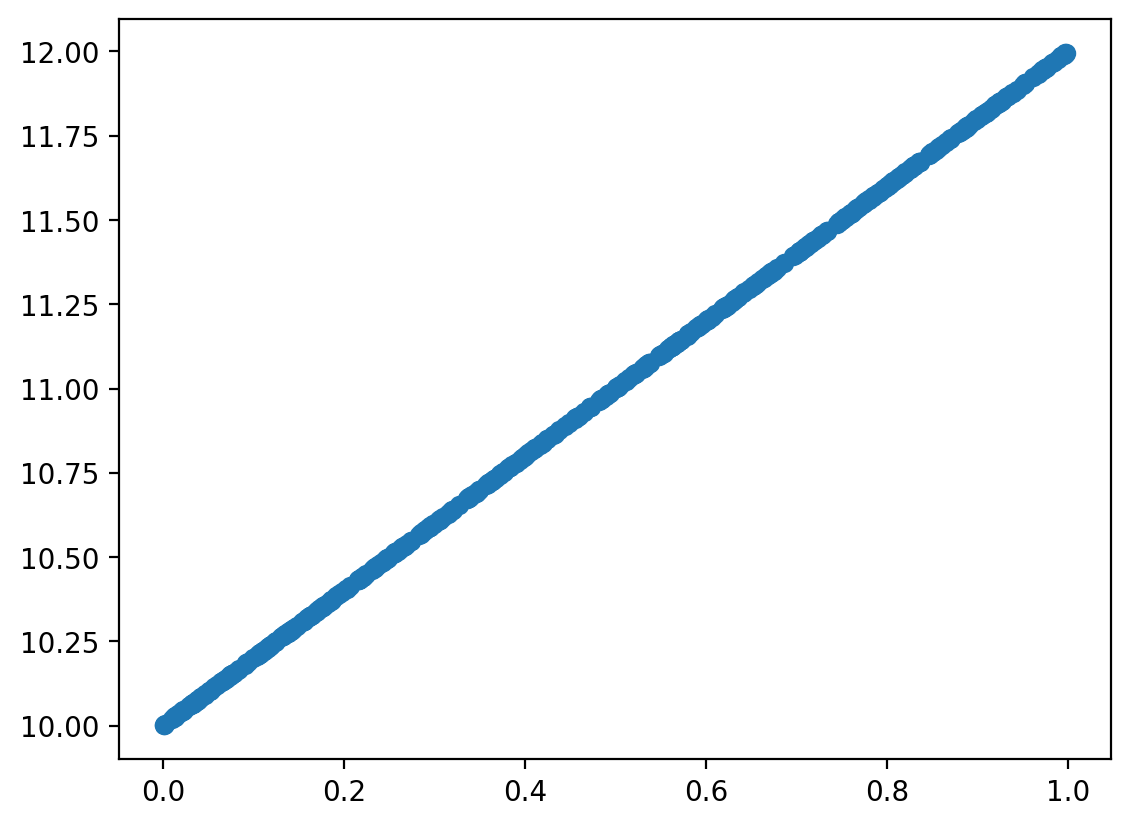

In [18]:
plt.scatter(sx, y)